In [136]:
import fiona
import geopandas as gpd
from osgeo import gdal
from osgeo import ogr

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Fiona: reading vector data

<p>Fiona is a minimalist python package for reading (and writing) vector
data in python.  Fiona provides python objects (e.g. a dictionary for
each record) to geospatial data in various formats.</p>

Reading in vector files with Fiona is - *good practice* - done using the `with` environment:

In [55]:
with fiona.open('../data/deelbekkens/Deelbekken.shp') as deelbekkens:
    feature = next(iter(deelbekkens)) # Just one checking the first
    print("Bekken: ", feature['properties']['BEKNAAM'])
    print("Vectortype: ", feature['geometry']['type'])
    print(feature['geometry']['coordinates'][0][0])

Bekken:  Boven-Scheldebekken
Vectortype:  Polygon
(98710.32800000161, 162573.7030000016)


This is actually equivalent to:

In [3]:
deelbekkens = fiona.open('../data/deelbekkens/Deelbekken.shp') 
feature = next(iter(deelbekkens))
print("Bekken: ", feature['properties']['BEKNAAM'])
print("Stroomgebied: ", feature['properties']['STRMGEB'])
print("Vectortype: ", feature['geometry']['type'])
deelbekkens.close()

Bekken:  Boven-Scheldebekken
Stroomgebied:  Schelde
Vectortype:  Polygon


But people tend to forget to use the `close`(!)

<div class="alert alert-info">
    <b>REMEMBER</b>: 
    <ul>
        <li> Instead of `open`-ing a file, do something and `close` again, use `with` (general Python advice)
    </ul>
</div>

The projection information is interpreted by Fiona as well:

In [33]:
with fiona.open('../data/deelbekkens/Deelbekken.shp') as deelbekkens:
    #print(deelbekkens.crs_wkt)
    print(deelbekkens.crs)
    print(deelbekkens.crs_wkt)

{'lon_0': 4.367486666666666, 'no_defs': True, 'lat_1': 49.8333339, 'x_0': 150000.01256, 'units': 'm', 'y_0': 5400088.4378, 'ellps': 'intl', 'proj': 'lcc', 'lat_2': 51.16666723333333, 'lat_0': 90}
PROJCS["Belge_Lambert_1972",GEOGCS["GCS_Belge_1972",DATUM["Reseau_National_Belge_1972",SPHEROID["International_1924",6378388.0,297.0]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["False_Easting",150000.01256],PARAMETER["False_Northing",5400088.4378],PARAMETER["Central_Meridian",4.367486666666666],PARAMETER["Standard_Parallel_1",49.8333339],PARAMETER["Standard_Parallel_2",51.16666723333333],PARAMETER["Latitude_Of_Origin",90.0],UNIT["Meter",1.0]]


<div class="alert alert-warning">
    <p>Actually, **GeoPandas relies on Fiona** and translates this information into a tabular information, compatible to Pandas:</p>
</div>

In [5]:
df_deelbekkens = gpd.read_file('../data/deelbekkens/Deelbekken.shp')
df_deelbekkens.head()

,BEKNAAM,BEKNR,DEELBEKKEN,LENGTE,OIDN,OPPERVL,STRMGEB,UIDN,geometry
0,Boven-Scheldebekken,6,06-02,35788.31,41,3.424316e+07,Schelde,142,"POLYGON ((98710.32800000161 162573.7030000016,..."
1,Demerbekken,9,09-02,73615.82,67,1.412802e+08,Schelde,812,"POLYGON ((201200.3610000014 183565.3020000011,..."
2,Leiebekken,5,05-04,65791.53,37,8.875261e+07,Schelde,936,"POLYGON ((74660.39793749899 190219.0009999983,..."
3,Boven-Scheldebekken,6,06-03,71432.94,42,1.782935e+08,Schelde,939,"POLYGON ((101010.7037499994 175254.0949999988,..."
4,Boven-Scheldebekken,6,06-04,71988.34,43,1.584879e+08,Schelde,940,"POLYGON ((105339.2030000016 188480.7000624985,..."


The capabilities to read file with `Fiona` is dependent on the available `drivers` on your computer. You can get an overview by asking fiona for the supported drivers:

In [6]:
fiona.supported_drivers

{'ARCGEN': 'r',
 'AeronavFAA': 'r',
 'BNA': 'raw',
 'DGN': 'raw',
 'DXF': 'raw',
 'ESRI Shapefile': 'raw',
 'GPKG': 'rw',
 'GPSTrackMaker': 'raw',
 'GPX': 'raw',
 'GeoJSON': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'OpenFileGDB': 'r',
 'PCIDSK': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

It provides also information about what you can do with the different types of data:
* `r`: reading
* `a`: appending (adding elements)
* `w`: writing 

<div class="alert alert-success">
    <b>EXERCISE</b>: 
<ul>
    <li>Open the `EUgrid10.geojson` file in the data folder using the Fiona package and check the `type` of `geometry` and the `cellcode` in the `properties` of the first feature in the dataset</li>
</ul>
</div>

In [7]:
with fiona.open('../data/EUgrid10.geojson') as eugrid:
    feature = next(iter(eugrid)) # Just one checking the first
    print("cellcode: ", feature['properties']['CellCode'])
    print("Vectortype: ", feature['geometry']['type'])

cellcode:  10kmE379N312
Vectortype:  Polygon


<div class="alert alert-success">
    <b>EXERCISE</b>: 
<ul>
    <li>Read again the EUgrid10.geojson file in the data folder, but use the GeoPandas library and show only the first feature</li>
</ul>
</div>

In [8]:
gpd.read_file('../data/EUgrid10.geojson').head(1)

,CellCode,EofOrigin,NofOrigin,geometry
0,10kmE379N312,3790000.0,3120000.0,"POLYGON ((2.429361848365367 50.9437587892485, ..."


So, what about GDAL?

In [9]:
driver = ogr.GetDriverByName('ESRI Shapefile')
deelbekken_gdal = driver.Open('../data/deelbekkens/Deelbekken.shp')
deelbekken_gdal.GetLayerCount()

1

In [10]:
deelbekken_layer = deelbekken_gdal.GetLayer()
print("The number of features of the deelbekken shapefile is: ", deelbekken_layer.GetFeatureCount())

The number of features of the deelbekken shapefile is:  102


That's why they call it `not pythonic`...

However, `GDAL` is powerfull for other activities, we'll come back to that later. Moreover, it supports mostly more file formats as fiona (GeoPandas) provide:

In [11]:
!ogr2ogr --formats

Supported Formats:
  PCIDSK -raster,vector- (rw+v): PCIDSK Database File
  netCDF -raster,vector- (rw+s): Network Common Data Format
  JP2OpenJPEG -raster,vector- (rwv): JPEG-2000 driver based on OpenJPEG library
  PDF -raster,vector- (w+): Geospatial PDF
  ESRI Shapefile -vector- (rw+v): ESRI Shapefile
  MapInfo File -vector- (rw+v): MapInfo File
  UK .NTF -vector- (ro): UK .NTF
  OGR_SDTS -vector- (ro): SDTS
  S57 -vector- (rw+v): IHO S-57 (ENC)
  DGN -vector- (rw+): Microstation DGN
  OGR_VRT -vector- (rov): VRT - Virtual Datasource
  REC -vector- (ro): EPIInfo .REC 
  Memory -vector- (rw+): Memory
  BNA -vector- (rw+v): Atlas BNA
  CSV -vector- (rw+v): Comma Separated Value (.csv)
  NAS -vector- (ro): NAS - ALKIS
  GML -vector- (rw+v): Geography Markup Language (GML)
  GPX -vector- (rw+v): GPX
  KML -vector- (rw+v): Keyhole Markup Language (KML)
  GeoJSON -vector- (rw+v): GeoJSON
  Interlis 1 -vector- (rw+): Interlis 1
  Interlis 2 -vector- (rw+): Interlis 2
  OGR_GMT -vector- (rw+

For example, the interaction with an Esri File GeoDataBase, is provided in [this](https://pcjericks.github.io/py-gdalogr-cookbook/vector_layers.html#get-all-layers-in-an-esri-file-geodatabase) example...

<div class="alert alert-info">
    <b>REMEMBER</b>: 
    <ul>
        <li> try `GeoPandas` first!
        <li> If that does not work, check if your available GDAL drivers support the format.
    </ul>
</div>

## Shapely: working with GEOMetries

<p>Shapely is a Python library for geometric operations using the **GEOS** library.</p>

<p>Shapely can perform:</p>
<ul>
<li>geometry validation</li>
<li>geometry creation (e.g. collections)</li>
<li>geometry operations</li>
</ul>

In [12]:
from shapely.geometry import LineString, Polygon

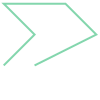

In [13]:
line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
line

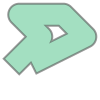

In [14]:
dilated = line.buffer(0.5, cap_style=3)
dilated

Getting back the coorindates as x, y arrays:

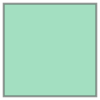

In [15]:
polygon = Polygon(LineString([(0.2, 0.2), (0.2, 1), (1, 1), (1, 0.2)]))
polygon

In [16]:
line.coords.xy

(array('d', [0.0, 1.0, 0.0, 2.0, 3.0, 1.0]),
 array('d', [0.0, 1.0, 2.0, 2.0, 1.0, 0.0]))

Binary predicates to check if the line is contained by the polygon

In [17]:
line.within(polygon)

False

<div class="alert alert-success">
    <b>EXERCISE</b>: 
<ul>
    <li>Check if the polygon intersects with the line object</li>
</ul>
</div>

In [29]:
polygon.intersects(line)

True

<div class="alert alert-warning">
    <p>Actually, **GeoPandas relies on shapely** and uses these geometric properties and operations</p>
</div>


In [19]:
deelbekkens = gpd.read_file("../data/deelbekkens/Deelbekken.shp")

In [22]:
demer = deelbekkens[deelbekkens["BEKNAAM"] == "Demerbekken"]

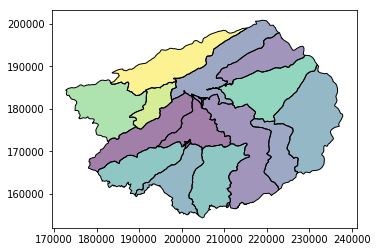

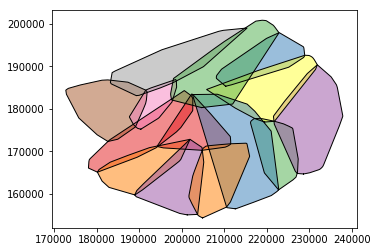

In [28]:
demer.plot()
demer.convex_hull.plot()

## pyproj: handling projections

Pyproj handles the Spatial Reference Systems (SRS) transformations. Actually, the only items to remember are:
* `pyproj.Proj`: define a SRS
* `pyproj.transform`: execute a transformation between two defined SRS

In [3]:
from pyproj import Proj, transform

### Define SRS

The easiest way is mostly just using the [`EPSG` code](http://spatialreference.org/):

Lambert 72:

In [4]:
srs_lambert = Proj(init='epsg:31370')

In [5]:
srs_lambert.srs

'+units=m +init=epsg:31370 '

WGS84:

In [6]:
srs_wgs84 = Proj(init='epsg:4326')

In [72]:
srs_wgs84.is_latlong()

True

Other methods to define the SRS are also available:

In [65]:
utm32 = Proj(proj="utm", zone="32")

### Transform coordinates

The transform function takes the two defined SRS objects, together with an X/Y coordinate combination

In [79]:
transform(srs_lambert, srs_wgs84, 98710.32800000161, 162573.7030000016)

(3.6416250241767285, 50.77139842297889)

<div class="alert alert-warning">
    <p>Actually, **GeoPandas relies on pyproj** to perform SRS transformations using the EPSG code (but calls it `coordinate reference system (CRS)`...)</p>
</div>


In [83]:
deelbekkens = gpd.read_file("../data/deelbekkens/Deelbekken.shp")
deelbekkens.crs

{'ellps': 'intl',
 'lat_0': 90,
 'lat_1': 49.8333339,
 'lat_2': 51.16666723333333,
 'lon_0': 4.367486666666666,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'm',
 'x_0': 150000.01256,
 'y_0': 5400088.4378}

In [170]:
deelbekkens.to_crs(epsg="4326").head()

,BEKNAAM,BEKNR,DEELBEKKEN,LENGTE,OIDN,OPPERVL,STRMGEB,UIDN,geometry
0,Boven-Scheldebekken,6,06-02,35788.31,41,3.424316e+07,Schelde,142,"POLYGON ((3.640380958468267 50.77194110334428,..."
1,Demerbekken,9,09-02,73615.82,67,1.412802e+08,Schelde,812,"POLYGON ((5.096246619823092 50.96063764873579,..."
2,Leiebekken,5,05-04,65791.53,37,8.875261e+07,Schelde,936,"POLYGON ((3.293811396280227 51.01780909378358,..."
3,Boven-Scheldebekken,6,06-03,71432.94,42,1.782935e+08,Schelde,939,"POLYGON ((3.671304769381964 50.88612188803884,..."
4,Boven-Scheldebekken,6,06-04,71988.34,43,1.584879e+08,Schelde,940,"POLYGON ((3.7312028078323 51.00536008942669, 3..."


Actually, the function is useful in general to transform the X/Y combinations in any coordinate table. Consider the following example of species data with the coordinates in WGS84.

In [106]:
inv_data = pd.read_excel("../data/invasive_extract.xlsx")

In [107]:
inv_data.head()

,occurrenceID,institutionCode,basisOfRecord,individualCount,eventID,eventDate,decimalLatitude,decimalLongitude,geodeticDatum,scientificName,vernacularName,verbatimDatasetName
0,INBO:NBN:BFN001790000AACI,INBO,HumanObservation,1,BFN00179000032JR,2005-10-31,51.24325,4.94202,WGS84,Muntiacus reevesii,Chinese muntjak,INBO - Muntjak - Losse waarnemingen
1,INBO:NBN:BFN0017900009DOC,INBO,HumanObservation,1,BFN0017900002LK3,2014-03-08,51.26218,4.49238,WGS84,Muntiacus reevesii,Chinese muntjak,INBO - Muntjak - Losse waarnemingen
2,INBO:NBN:BFN001790000A4J0,INBO,HumanObservation,0,BFN001790000310S,2015-02-20,51.25701,4.49054,WGS84,Muntiacus reevesii,Chinese muntjak,INBO - Muntjak - Bestrijding
3,INBO:NBN:BFN0017900009DO8,INBO,HumanObservation,1,BFN0017900002LJZ,2014-05-24,51.27518,4.54044,WGS84,Muntiacus reevesii,Chinese muntjak,INBO - Muntjak - Losse waarnemingen
4,INBO:NBN:BFN001790000AACF,INBO,HumanObservation,1,BFN00179000032JO,2005-02-28,51.30803,5.95192,WGS84,Muntiacus reevesii,Chinese muntjak,INBO - Muntjak - Losse waarnemingen


Conversion to Lambert 72 is supported by the `pyproj` Package as follows. As I want to support future usage of this functionality as well, I'll write my own custom function:

In [125]:
def transform_dfrow_projection(row, x_name, y_name, srs_from, srs_to):
    """
    Converts the x and y coordinates of a given DataFrame row into a Series of the
    longitude and latitude.
    """
    from pyproj import transform
    return pd.Series(transform(srs_from, srs_to, row[x_name], row[y_name]))

For a single row, this looks like:

In [126]:
transform_dfrow_projection(inv_data.loc[0], "decimalLongitude", "decimalLatitude", 
                           srs_wgs84, srs_lambert)

0    190031.454149
1    214969.768781
dtype: float64

`Apply`ing this to the entire table:

In [127]:
inv_data[["x", "y"]] = inv_data.apply(transform_dfrow_projection, axis=1, 
                                      args=("decimalLongitude", "decimalLatitude", 
                                            srs_wgs84, srs_lambert))

This feels too complicated?!?Understandable ,but let's just once take the effort to compile this into a reusable function...

In [130]:
def add_trf_coordinates(filename, x_name="decimalLongitude", y_name="decimalLatitude", 
                        srs_from='epsg:4326', srs_to='epsg:31370', 
                        new_x="X", new_y="Y"):
    """Add new X/Y columns with transformed SRS to a given Excel dataset with X/Y columns
    
    Parameters
    ----------
    filename : str
        Path to excel file to read dat from
    x_name : str
        Column containing the x-coordinates (default decimalLongitude)
    y_name : str
        Column containing the y-coordinates (default decimalLatitude)  
    srs_from: str
        epsg:n code for the current SRS of the coordinates
    srs_to: str
        epsg:n code for the SRS of the added coordinates
    new_x: str
        name of the added x-coordinate column
    new_y: str
        name of the added y-coordinate column    
    
    returns
    -------
    df with 2 additional columns
    """
    df = pd.read_excel("../data/invasive_extract.xlsx")
    srs_from = Proj(init=srs_from)
    srs_to = Proj(init=srs_to)
    df[[new_x, new_y]] = df.apply(transform_dfrow_projection, axis=1, 
                                  args=(x_name, y_name, srs_from, srs_to))
    return df

In [134]:
df_enriched = add_trf_coordinates("../data/invasive_extract.xlsx")
df_enriched.head()

,occurrenceID,institutionCode,basisOfRecord,individualCount,eventID,eventDate,decimalLatitude,decimalLongitude,geodeticDatum,scientificName,vernacularName,verbatimDatasetName,X,Y
0,INBO:NBN:BFN001790000AACI,INBO,HumanObservation,1,BFN00179000032JR,2005-10-31,51.24325,4.94202,WGS84,Muntiacus reevesii,Chinese muntjak,INBO - Muntjak - Losse waarnemingen,190031.454149,214969.768781
1,INBO:NBN:BFN0017900009DOC,INBO,HumanObservation,1,BFN0017900002LK3,2014-03-08,51.26218,4.49238,WGS84,Muntiacus reevesii,Chinese muntjak,INBO - Muntjak - Losse waarnemingen,158629.195764,216928.200934
2,INBO:NBN:BFN001790000A4J0,INBO,HumanObservation,0,BFN001790000310S,2015-02-20,51.25701,4.49054,WGS84,Muntiacus reevesii,Chinese muntjak,INBO - Muntjak - Bestrijding,158501.706616,216352.792717
3,INBO:NBN:BFN0017900009DO8,INBO,HumanObservation,1,BFN0017900002LJZ,2014-05-24,51.27518,4.54044,WGS84,Muntiacus reevesii,Chinese muntjak,INBO - Muntjak - Losse waarnemingen,161980.579626,218381.238124
4,INBO:NBN:BFN001790000AACF,INBO,HumanObservation,1,BFN00179000032JO,2005-02-28,51.30803,5.95192,WGS84,Muntiacus reevesii,Chinese muntjak,INBO - Muntjak - Losse waarnemingen,260392.782666,223200.057109


**Remark** that GDAL also has a utility [gdalsrsinfo](http://www.gdal.org/gdalsrsinfo.html) to get/check the SRS information of GIS file:

In [132]:
! gdalsrsinfo -o proj4 ../data/EUgrid10.geojson  #try also wiht -o all

'+proj=longlat +datum=WGS84 +no_defs '


Or to execute the transformation of a dataset together with the transformation of the data type:

In [7]:
!ogr2ogr -t_srs "EPSG:4326" -f "GeoJSON" "../data/deelbekken.geojson" "../data/deelbekkens/Deelbekken.shp"

## Geopandas: Pandas + geometries

Actually, we got a whole sequence of data types (objects) to end up with GeoDataFrames:
* lists/dictionaries -> standard Python library 
* Numpy arrays -> table of elements (usually numbers), all of the same type, indexed by positive integers
* DataFrames -> Labeled Numpy arrays
* GeoDataFrames -> DataFrames with geometry and SRS information attached to it

Our `df_enriched` is a Pandas DataFrame, so we can convert to a GeoDataFrame by converting the coordinates to a set of POINT geometries:

In [217]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df_enriched["X"], df_enriched["Y"])]
crs = {'init': 'epsg:31370'}
geo_df = gpd.GeoDataFrame(df_enriched, crs=deelbekkens.crs, geometry=geometry)

In [197]:
import mplleaflet

In [214]:
fig, ax = plt.subplots()
geo_df.to_crs(epsg="4326").plot(markersize=10, ax=ax) # on the fly conversion to WGS84
mplleaflet.display()

<div class="alert alert-success">
    <b>EXERCISE</b>: 
<ul>
    <li>Add the UIDN and BEKNAAM names from the `deelbekkens` data to the occurrence data `df_enriched` with a **spatial JOIN**
</ul>
</div>

In [208]:
gpd.sjoin(geo_df, deelbekkens[["BEKNAAM", "UIDN", "geometry"]], how='left', op="within")

,occurrenceID,institutionCode,basisOfRecord,individualCount,eventID,eventDate,decimalLatitude,decimalLongitude,geodeticDatum,scientificName,vernacularName,verbatimDatasetName,X,Y,geometry,index_right,BEKNAAM,UIDN
0,INBO:NBN:BFN001790000AACI,INBO,HumanObservation,1,BFN00179000032JR,2005-10-31,51.24325,4.94202,WGS84,Muntiacus reevesii,Chinese muntjak,INBO - Muntjak - Losse waarnemingen,190031.454149,214969.768781,POINT (190031.45414914 214969.7687812252),92.0,Netebekken,1272.0
1,INBO:NBN:BFN0017900009DOC,INBO,HumanObservation,1,BFN0017900002LK3,2014-03-08,51.26218,4.49238,WGS84,Muntiacus reevesii,Chinese muntjak,INBO - Muntjak - Losse waarnemingen,158629.195764,216928.200934,POINT (158629.1957644873 216928.2009336753),47.0,Beneden-Scheldebekken,1188.0
2,INBO:NBN:BFN001790000A4J0,INBO,HumanObservation,0,BFN001790000310S,2015-02-20,51.25701,4.49054,WGS84,Muntiacus reevesii,Chinese muntjak,INBO - Muntjak - Bestrijding,158501.706616,216352.792717,POINT (158501.7066164484 216352.7927171728),47.0,Beneden-Scheldebekken,1188.0
3,INBO:NBN:BFN0017900009DO8,INBO,HumanObservation,1,BFN0017900002LJZ,2014-05-24,51.27518,4.54044,WGS84,Muntiacus reevesii,Chinese muntjak,INBO - Muntjak - Losse waarnemingen,161980.579626,218381.238124,POINT (161980.579625568 218381.2381236907),96.0,Beneden-Scheldebekken,1276.0
4,INBO:NBN:BFN001790000AACF,INBO,HumanObservation,1,BFN00179000032JO,2005-02-28,51.30803,5.95192,WGS84,Muntiacus reevesii,Chinese muntjak,INBO - Muntjak - Losse waarnemingen,260392.782666,223200.057109,POINT (260392.7826660981 223200.0571094267),NaN,NaN,NaN
5,INBO:NBN:BFN001790000A4JO,INBO,HumanObservation,0,BFN001790000311B,2015-02-24,51.25803,4.49496,WGS84,Muntiacus reevesii,Chinese muntjak,INBO - Muntjak - Bestrijding,158810.077226,216466.792154,POINT (158810.0772255713 216466.7921539275),47.0,Beneden-Scheldebekken,1188.0
6,INBO:NBN:BFN001790000A4K8,INBO,HumanObservation,0,BFN001790000311U,2015-02-20,51.26106,4.49580,WGS84,Muntiacus reevesii,Chinese muntjak,INBO - Muntjak - Bestrijding,158868.137210,216803.999066,POINT (158868.1372097688 216803.9990656227),47.0,Beneden-Scheldebekken,1188.0
7,INBO:NBN:BFN001790000A51G,INBO,HumanObservation,1,BFN00179000031CR,2016-03-08,51.04185,5.68327,WGS84,Muntiacus reevesii,Chinese muntjak,INBO - Muntjak - Losse waarnemingen,242186.659443,193225.720281,POINT (242186.6594428579 193225.720281112),28.0,Maasbekken,1123.0
8,INBO:NBN:BFN001790000A4J3,INBO,HumanObservation,0,BFN001790000310V,2015-02-25,51.25701,4.49054,WGS84,Muntiacus reevesii,Chinese muntjak,INBO - Muntjak - Bestrijding,158501.706616,216352.792717,POINT (158501.7066164484 216352.7927171728),47.0,Beneden-Scheldebekken,1188.0
9,INBO:NBN:BFN001790000A4J5,INBO,HumanObservation,1,BFN001790000310X,2015-02-27,51.25701,4.49054,WGS84,Muntiacus reevesii,Chinese muntjak,INBO - Muntjak - Bestrijding,158501.706616,216352.792717,POINT (158501.7066164484 216352.7927171728),47.0,Beneden-Scheldebekken,1188.0


<div class="alert alert-success">
    <b>EXERCISE</b>: 
<ul>
    <li>Plot the `geo_df` together with a buffered version of 500m of each of the individual points, use mplleaflet to make the plot interactive
</ul>
</div>

In [215]:
fig, ax = plt.subplots()
geo_df.to_crs(epsg="4326").plot(markersize=10, ax=ax) # on the fly conversion to WGS84
geo_df.buffer(500).to_crs(epsg="4326").plot(ax=ax) # on the fly conversion to WGS84
mplleaflet.display()

For those interested, also check the following example from Joris Vandenbossche, explaining how to derive the distance to the nearest green area for all adresses in the centre of Antwerp:
* https://gist.github.com/jorisvandenbossche/7b30ed43366a85af8626